In [65]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import set_style
set_style('whitegrid')
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)

In [139]:
gross_data = pd.read_csv('https://raw.githubusercontent.com/tacookson/data/master/broadway-grosses/grosses.csv',parse_dates = ['week_ending'])
show_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/show_info_1985-2019.csv')
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])

In [140]:
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])
CPI_data.rename(columns = {'CWSR0000SA0':'CPI'}, inplace = True)
gross_data['year'] = gross_data['week_ending'].dt.year
gross_data['month_c'] = [d.strftime('%b') for d in gross_data.week_ending]
gross_data['month'] = gross_data['week_ending'].dt.month
CPI_data['year'] = CPI_data['DATE'].dt.year
CPI_data['month']= CPI_data['DATE'].dt.month
gross_data

,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,year,month_c,month
0,1985-06-09,1,3915937.00,42nd Street,St. James Theatre,282368.00,NaN,30.42,NaN,9281,1655,0.7010,8,0,1985,Jun,6
1,1985-06-09,1,3915937.00,A Chorus Line,Sam S. Shubert Theatre,222584.00,NaN,27.25,NaN,8167,1472,0.6935,8,0,1985,Jun,6
2,1985-06-09,1,3915937.00,Aren't We All?,Brooks Atkinson Theatre,249272.00,NaN,33.75,NaN,7386,1088,0.8486,8,0,1985,Jun,6
3,1985-06-09,1,3915937.00,Arms and the Man,Circle in the Square Theatre,95688.00,NaN,20.87,NaN,4586,682,0.8405,8,0,1985,Jun,6
4,1985-06-09,1,3915937.00,As Is,Lyceum Theatre,61059.00,NaN,20.78,NaN,2938,684,0.5369,8,0,1985,Jun,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,26109896.25,The Phantom of the Opera,Majestic Theatre,639215.93,1358986.0,72.18,213.0,8856,1605,0.6897,8,0,2020,Mar,3
47520,2020-03-01,40,26109896.25,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1320766.00,1566688.0,132.02,297.0,10004,1478,0.8461,8,0,2020,Mar,3
47521,2020-03-01,40,26109896.25,To Kill A Mockingbird,Sam S. Shubert Theatre,1132278.54,1549625.0,115.41,423.0,9811,1435,0.9767,7,0,2020,Mar,3
47522,2020-03-01,40,26109896.25,West Side Story,Broadway Theatre,1598947.32,1722464.0,114.87,373.0,13920,1740,1.0000,8,0,2020,Mar,3


In [141]:
CPI_data['CPI'] = CPI_data.iloc[-1]['CPI']/CPI_data['CPI']
CPI_data

,DATE,CPI,year,month
0,1947-01-01,13.148889,1947,1
1,1947-02-01,13.064213,1947,2
2,1947-03-01,12.839783,1947,3
3,1947-04-01,12.839783,1947,4
4,1947-05-01,12.863043,1947,5
...,...,...,...,...
899,2021-12-01,1.031327,2021,12
900,2022-01-01,1.024507,2022,1
901,2022-02-01,1.015750,2022,2
902,2022-03-01,1.001908,2022,3


### Updating the value of dollars of previous years to present dollar value 

In [155]:
CPI_data2 = CPI_data[['CPI','month','year']]
gross_data2 = gross_data.merge(CPI_data2, how = 'left', on = ['month', 'year'])
gross_data['weekly_gross_overall'] = gross_data2['weekly_gross_overall']*gross_data2['CPI']
gross_data['weekly_gross'] = gross_data2['weekly_gross']*gross_data2['CPI']
gross_data['avg_ticket_price'] = gross_data2['avg_ticket_price']*gross_data2['CPI']
gross_data['potential_gross'] = gross_data2['potential_gross']*gross_data2['CPI']
gross_data['top_ticket_price']= gross_data2['top_ticket_price']*gross_data2['CPI']
gross_data['year']=gross_data.year.astype(int).astype(str)
gross_data

,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,year,month_c,month
0,1985-06-09,1,2.764177e+07,42nd Street,St. James Theatre,1.993176e+06,NaN,214.728363,NaN,9281,1655,0.7010,8,0,1985,Jun,6
1,1985-06-09,1,2.764177e+07,A Chorus Line,Sam S. Shubert Theatre,1.571174e+06,NaN,192.352001,NaN,8167,1472,0.6935,8,0,1985,Jun,6
2,1985-06-09,1,2.764177e+07,Aren't We All?,Brooks Atkinson Theatre,1.759558e+06,NaN,238.234130,NaN,7386,1088,0.8486,8,0,1985,Jun,6
3,1985-06-09,1,2.764177e+07,Arms and the Man,Circle in the Square Theatre,6.754414e+05,NaN,147.316927,NaN,4586,682,0.8405,8,0,1985,Jun,6
4,1985-06-09,1,2.764177e+07,As Is,Lyceum Theatre,4.310026e+05,NaN,146.681636,NaN,2938,684,0.5369,8,0,1985,Jun,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,3.330781e+07,The Phantom of the Opera,Majestic Theatre,8.154334e+05,1.733628e+06,92.078399,271.719299,8856,1605,0.6897,8,0,2020,Mar,3
47520,2020-03-01,40,3.330781e+07,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1.684871e+06,1.998589e+06,168.414938,378.876206,10004,1478,0.8461,8,0,2020,Mar,3
47521,2020-03-01,40,3.330781e+07,To Kill A Mockingbird,Sam S. Shubert Theatre,1.444422e+06,1.976822e+06,147.225936,539.611566,9811,1435,0.9767,7,0,2020,Mar,3
47522,2020-03-01,40,3.330781e+07,West Side Story,Broadway Theatre,2.039741e+06,2.197309e+06,146.537070,475.827693,13920,1740,1.0000,8,0,2020,Mar,3


Text(0, 0.5, 'Weekly Gross(Overall)')

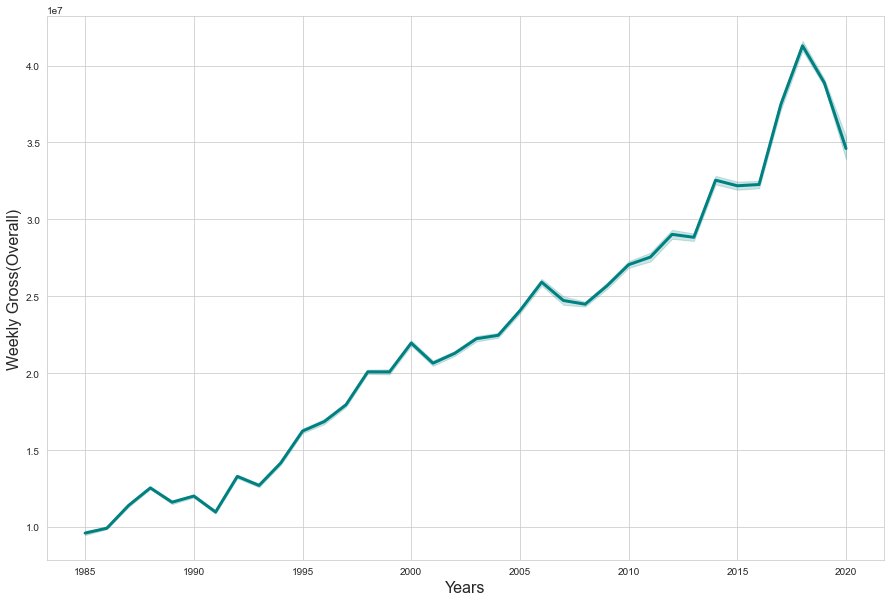

In [89]:
sns.lineplot(x=gross_data['year'],y=gross_data['weekly_gross_overall'],color="teal",linewidth="3")
plt.xlabel('Years',fontsize=16)
plt.ylabel('Weekly Gross(Overall)',fontsize=16)

Text(0.5, 1.0, 'Average ticket price per year')

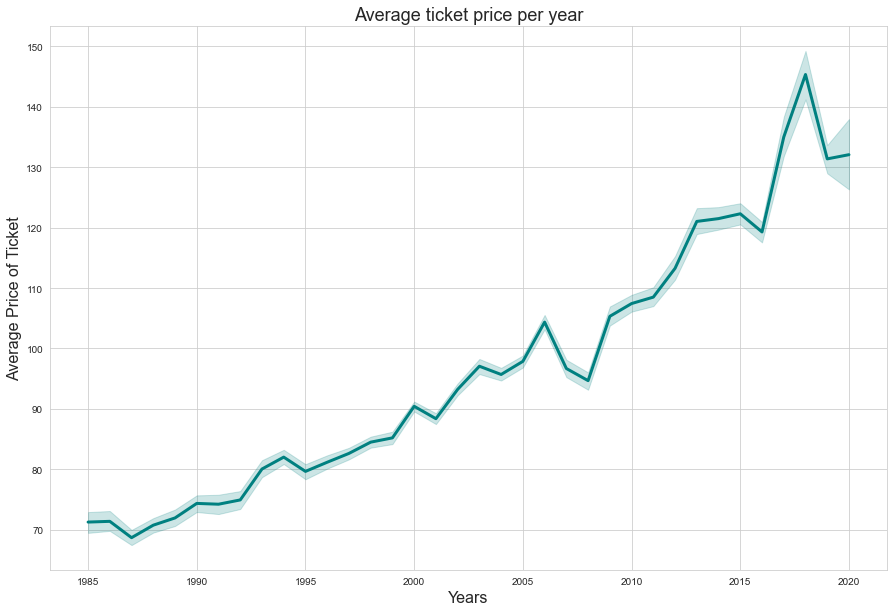

In [92]:
sns.lineplot(x=gross_data['year'],y=gross_data['avg_ticket_price'],color="teal",linewidth="3")
plt.xlabel('Years',fontsize=16)
plt.ylabel('Average Price of Ticket',fontsize=16)
plt.title('Average ticket price per year',fontsize=18)

Text(0.5, 1.0, 'Theater seats Sold every year')

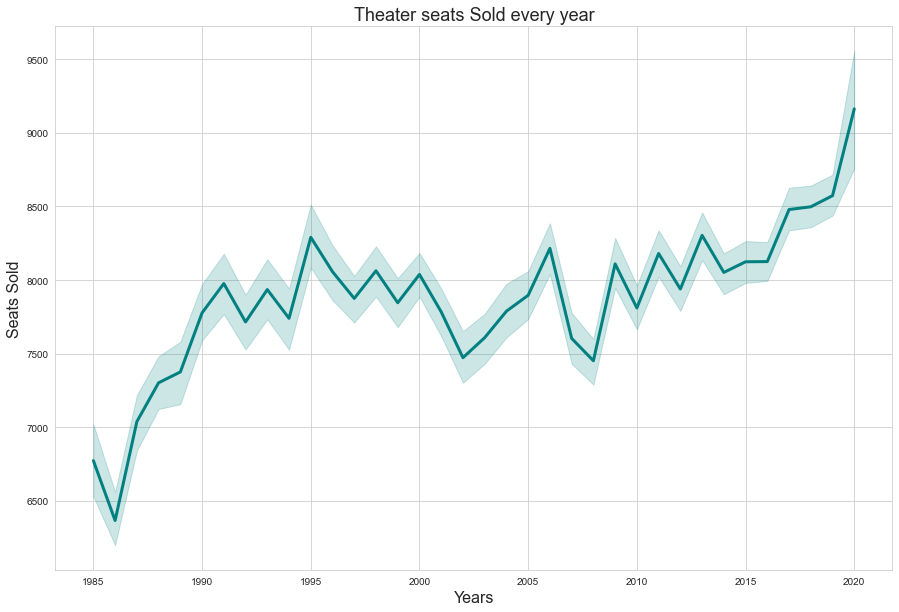

In [94]:
sns.lineplot(x=gross_data['year'],y=gross_data['seats_sold'],color="teal",linewidth="3")
plt.xlabel('Years',fontsize=16)
plt.ylabel('Seats Sold',fontsize=16)
plt.title('Theater seats Sold every year',fontsize=18)

Text(0.5, 1.0, 'Percentage Capacity every year')

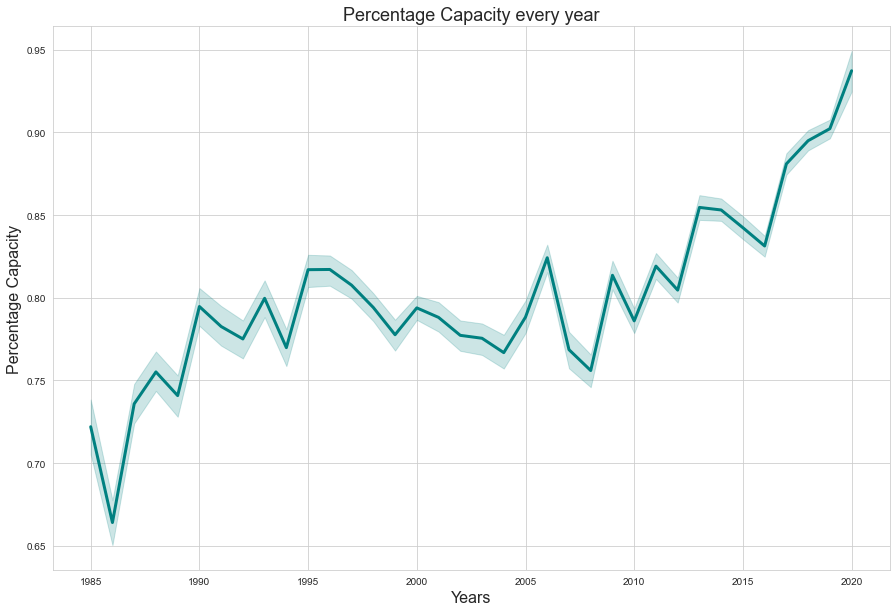

In [95]:
sns.lineplot(x=gross_data['year'],y=gross_data['pct_capacity'],color="teal",linewidth="3")
plt.xlabel('Years',fontsize=16)
plt.ylabel('Percentage Capacity',fontsize=16)
plt.title('Percentage Capacity every year',fontsize=18)

### Yearly trend of Weekly Gross (Overall) in every week

Text(0, 0.5, 'Gross')

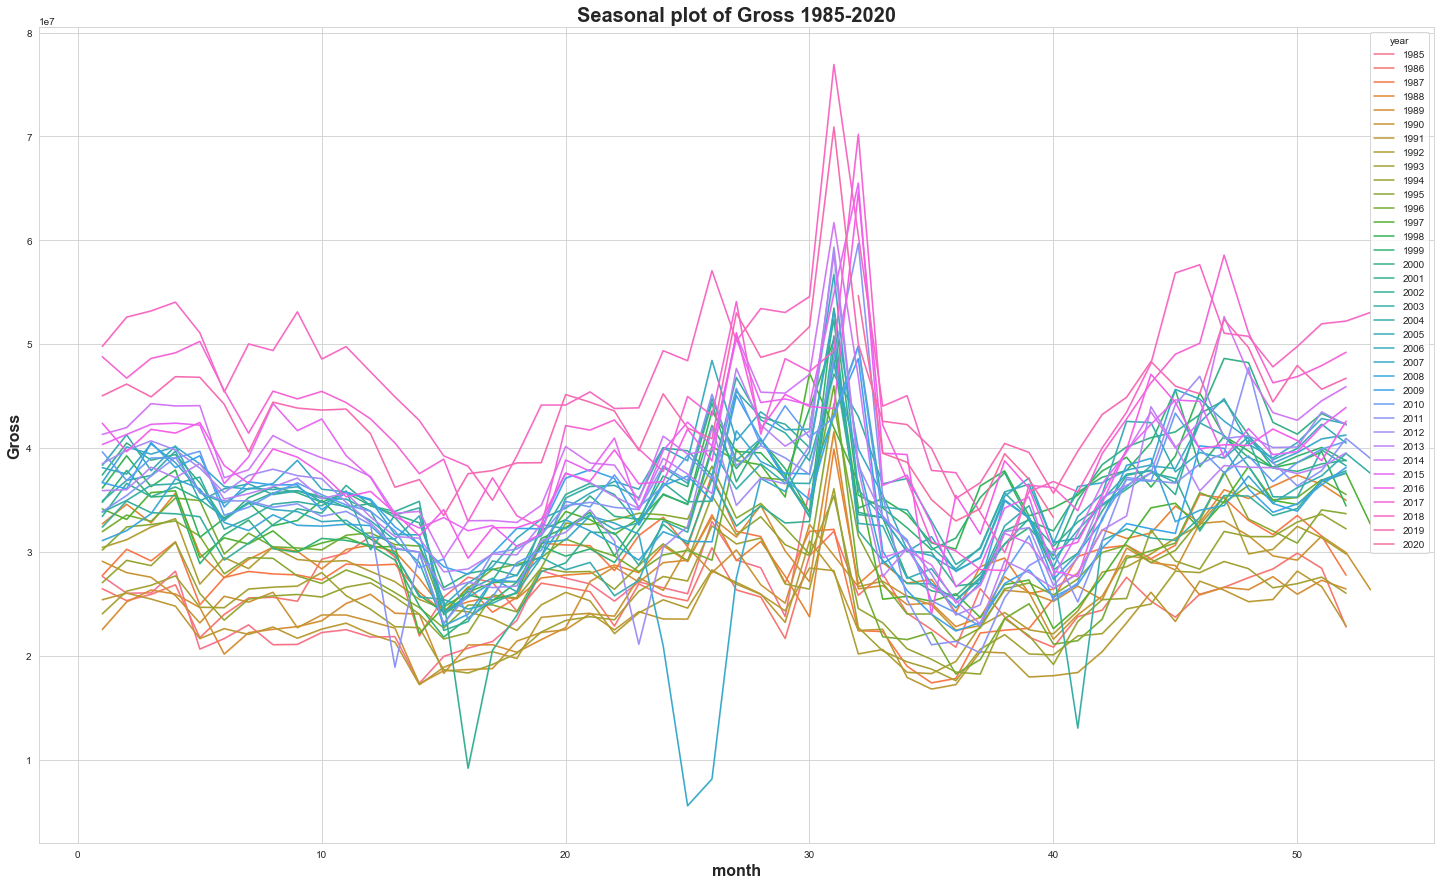

In [175]:
## September(Autumn) has been recorded as the most preferrable years.
### Also, every successive years, the month of September has been recorded as the most preferred successively
variable = 'weekly_gross_overall'
fig, ax = plt.subplots(figsize=(25,15))
palette = sns.color_palette("rocket_r", as_cmap=True)
sns.lineplot(gross_data['week_number'], gross_data[variable], hue=gross_data['year'])
ax.set_title('Seasonal plot of Gross 1985-2020', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross', fontsize = 16, fontdict=dict(weight='bold'))

Text(0, 0.5, 'Gross')

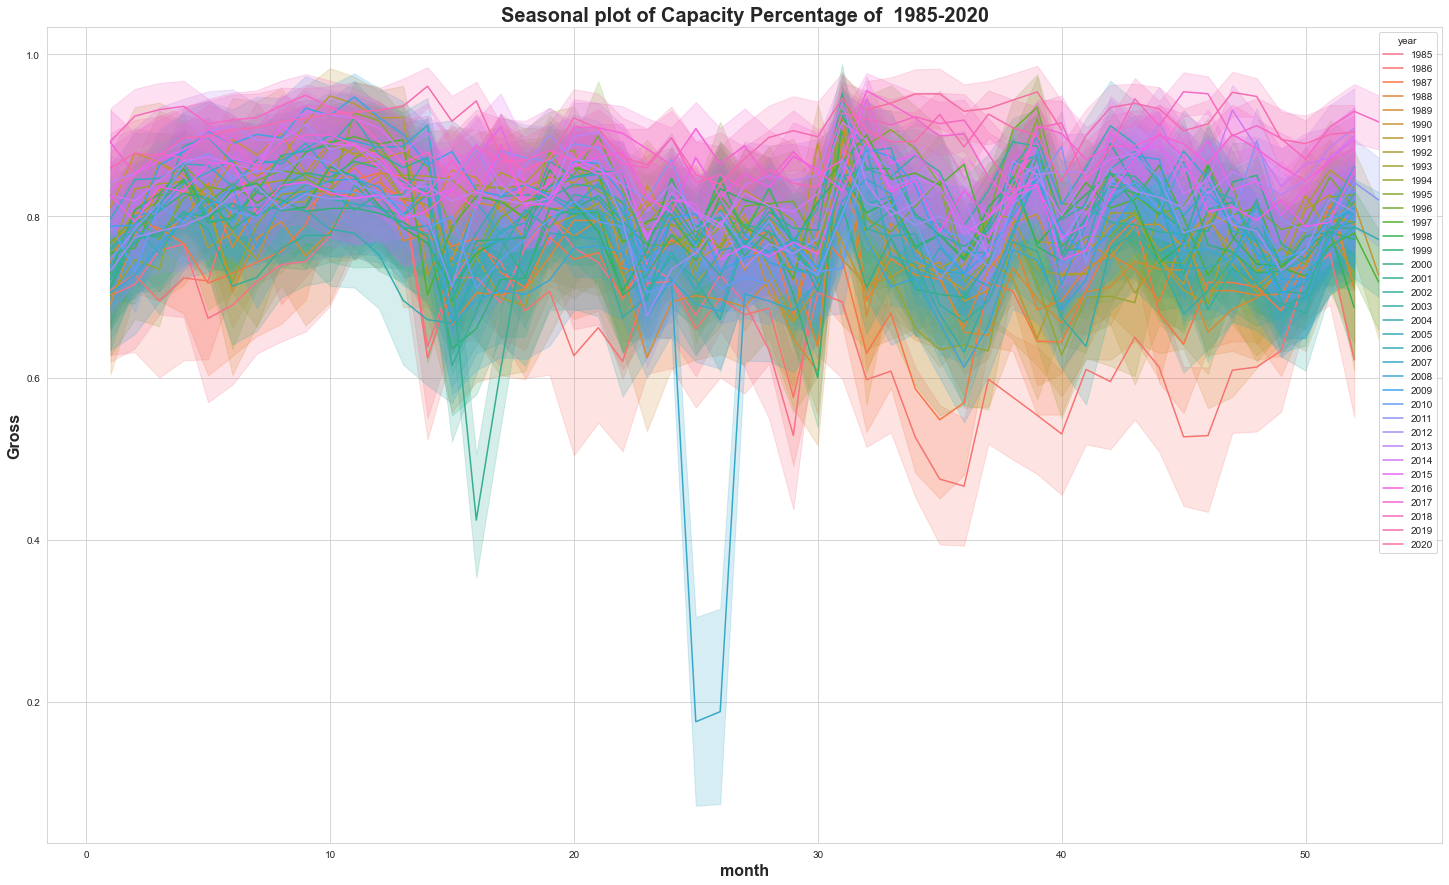

In [171]:
## Years of 2007-08 has been recorded the greatest dip ever in the entire data
variable = 'pct_capacity'
fig, ax = plt.subplots(figsize=(25,15))
palette = sns.color_palette("rocket_r", as_cmap=True)
sns.lineplot(gross_data['week_number'], gross_data[variable], hue=gross_data['year'])
ax.set_title('Seasonal plot of Capacity Percentage of  1985-2020', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross', fontsize = 16, fontdict=dict(weight='bold'))

Text(0, 0.5, 'Gross')

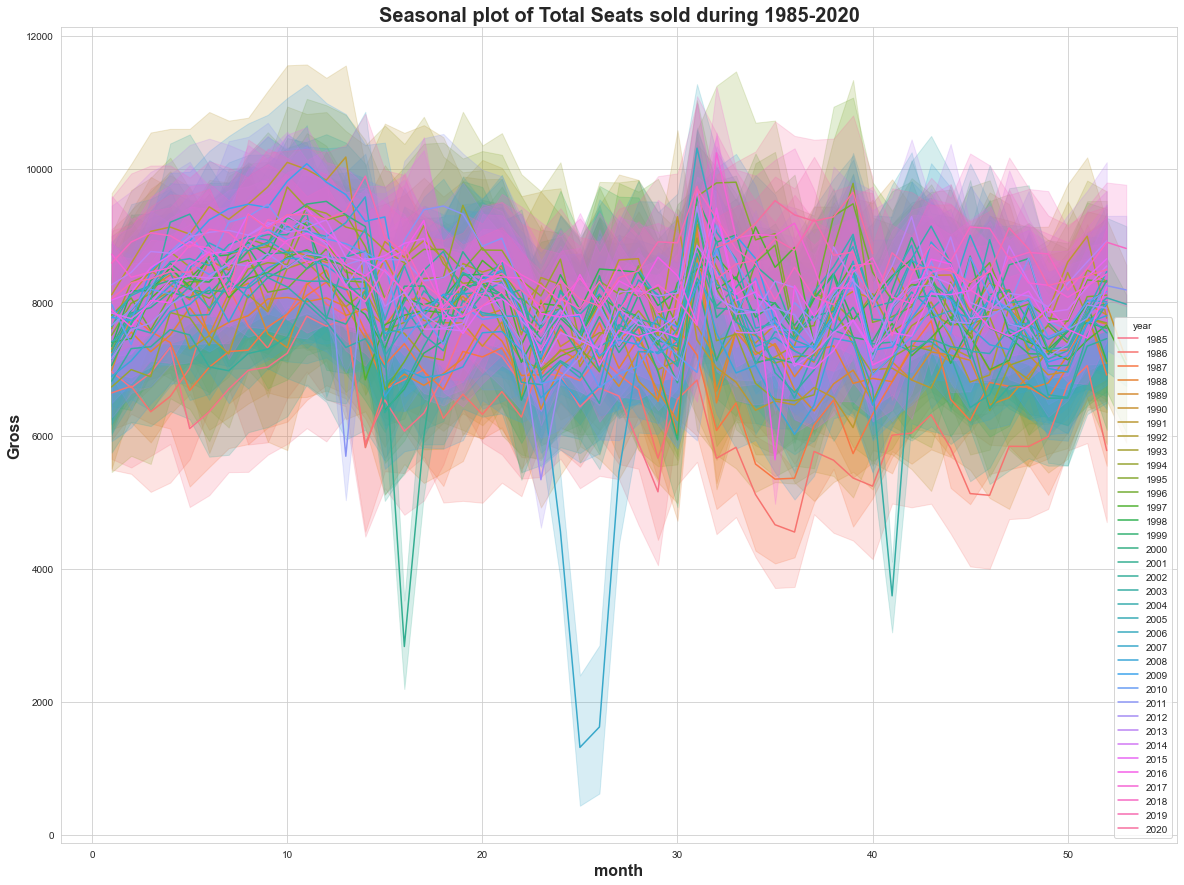

In [176]:
## Total Seats sold
## Along with the 2007-08 financial loss, a steepest dip has been recorded in 1999 and 2000
df = gross_data[['seats_sold','year','month', 'week_number']]
df2 = df.groupby(['week_number','year','month']).sum()
fig, ax = plt.subplots(figsize=(20,15))
palette = sns.color_palette("rocket_r", as_cmap=True)
sns.lineplot(gross_data['week_number'], gross_data['seats_sold'], hue=gross_data['year'])
ax.set_title('Seasonal plot of Total Seats sold during 1985-2020', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross', fontsize = 16, fontdict=dict(weight='bold'))

In [168]:
## Keeping this cell subject to further exploration
## trying to use this->'NoneType' object has no attribute 'startswith'
## but giving an error
df = gross_data[['seats_sold','year','month_c']]
df2 = df.groupby(['year','month_c']).sum()
df2.reset_index
dates = pd.to_datetime(list(map(lambda x: '-'.join(x) + '-1',df2.index.values)))
df2.index = pd.DatetimeIndex(dates,freq='MS')
fig = sm.graphics.tsa.month_plot(df2)

ValueError: Inferred frequency None from passed values does not conform to passed frequency MS

In [178]:
df = gross_data[['seats_sold','year','month', 'week_number']]
df2 = df.groupby(['week_number','year','month']).sum()
df2.reset_index

<bound method DataFrame.reset_index of                         seats_sold
week_number year month            
1           1985 6          132214
            1986 6          132806
            1987 6          145839
            1988 6          173942
            1989 6          125656
...                            ...
53          1990 6          149905
            1997 6          218916
            2004 5          247117
            2011 5          278340
            2018 5          308320

[1812 rows x 1 columns]>

In [187]:
stock = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/dataset_summary.csv',parse_dates=['stock_from_date'])
#stock['stock_from_date'] = stock.stock_from_date.astype(int).astype(str)
#stock.sort_values(by='stock_from_date',ascending=True)
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7786 entries, 0 to 7785
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   symbol              7786 non-null   object        
 1   total_prices        7786 non-null   int64         
 2   stock_from_date     7786 non-null   datetime64[ns]
 3   stock_to_date       7786 non-null   object        
 4   total_earnings      7786 non-null   int64         
 5   earnings_from_date  5187 non-null   object        
 6   earnings_to_date    5187 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 425.9+ KB


In [188]:
sns.scatterplot(x=stock['stock_from_date'],y=stock['total_prices'],color="teal",linewidth="3")

<AxesSubplot:xlabel='stock_from_date', ylabel='total_prices'>

TypeError: must be real number, not str

<Figure size 1080x720 with 1 Axes>

## Reference
https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.month_plot.html